In [2]:
# Create col that is a prediction percentage
# Create col of binary prediction
# Compare to outcome with confusion matrix

In [3]:
import pandas as pd
import numpy as np
Diabetes = pd.read_csv('diabetes.csv')

In [4]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
Diabetes.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<Axes: xlabel='Pregnancies', ylabel='Pregnancies'>,
        <Axes: xlabel='Glucose', ylabel='Pregnancies'>,
        <Axes: xlabel='BloodPressure', ylabel='Pregnancies'>,
        <Axes: xlabel='SkinThickness', ylabel='Pregnancies'>,
        <Axes: xlabel='Insulin', ylabel='Pregnancies'>,
        <Axes: xlabel='BMI', ylabel='Pregnancies'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Pregnancies'>,
        <Axes: xlabel='Age', ylabel='Pregnancies'>],
       [<Axes: xlabel='Pregnancies', ylabel='Glucose'>,
        <Axes: xlabel='Glucose', ylabel='Glucose'>,
        <Axes: xlabel='BloodPressure', ylabel='Glucose'>,
        <Axes: xlabel='SkinThickness', ylabel='Glucose'>,
        <Axes: xlabel='Insulin', ylabel='Glucose'>,
        <Axes: xlabel='BMI', ylabel='Glucose'>,
        <Axes: xlabel='DiabetesPedigreeFunction', ylabel='Glucose'>,
        <Axes: xlabel='Age', ylabel='Glucose'>],
       [<Axes: xlabel='Pregnancies', ylabel='BloodPressure'>,
        <Axes: xlabel=

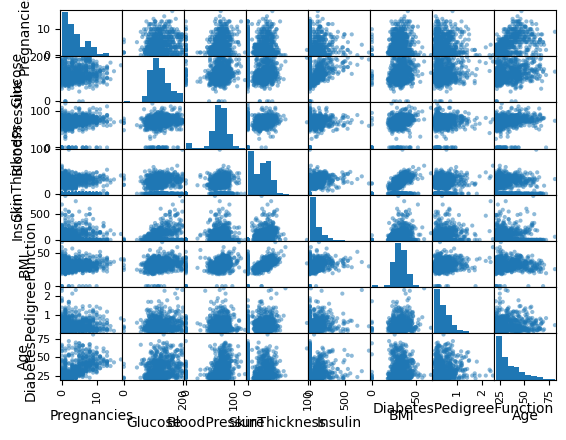

In [6]:
df =  pd.DataFrame(data=Diabetes)
pd.plotting.scatter_matrix(df.drop('Outcome', inplace=False, axis=1))

In [7]:
from sklearn.model_selection import train_test_split
X = Diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = Diabetes['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

### Num of zeros in cols that don't expect a zero val:

In [8]:
#(Diabetes['SkinThickness'] == 0).sum()

# Glucose: 5 
# Blood Pressure: 35 
# Skin Thickness: 227 
# Insulin: 374
# BMI: 11 


# What is the most important factor in predecting whether someone is diabetic?

# How can we assess each entry and categorize them by risk groups (LO, MED, HI) based on health indicators?

In [39]:
means = {
    'Glucose': np.mean(Diabetes.Glucose),
    'BloodPressure': np.mean(Diabetes.BloodPressure),
    'SkinThickness': np.mean(Diabetes.SkinThickness),
    'Insulin': np.mean(Diabetes.Insulin),
    'BMI': np.mean(Diabetes.BMI),
    'DiabetesPedigreeFunction': np.mean(Diabetes.DiabetesPedigreeFunction),
    'Age': np.mean(Diabetes.Age)
    } 
means

{'Glucose': 120.89453125,
 'BloodPressure': 69.10546875,
 'SkinThickness': 20.536458333333332,
 'Insulin': 79.79947916666667,
 'BMI': 31.992578124999998,
 'DiabetesPedigreeFunction': 0.47187630208333325,
 'Age': 33.240885416666664}

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
X = Diabetes[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].values
y = Diabetes['Outcome'].values

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train.ravel())
y_pred = knn.predict(X_test)
accuracy = (y_pred == y_test.ravel()).mean()
print(accuracy)

0.7552083333333334


RiskGroup
2    311
1    264
3    193
Name: count, dtype: int64


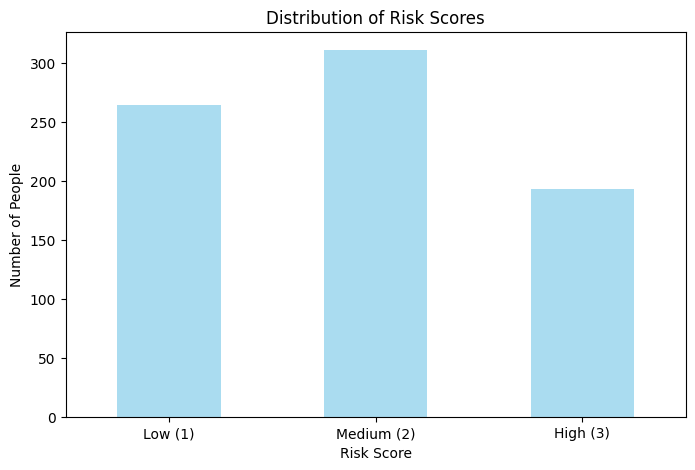

In [57]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def categorize_risk(row, means):
    score = sum(row[feature] > mean for feature, mean in means.items())
    if score <= 2:
        return 1
    if score <= 4:
        return 2
    ## Group 3 accuracy increases as its min score threshold increases
    else:
        return 3

Diabetes['RiskGroup'] = Diabetes.apply(categorize_risk, means=means, axis=1)

print(Diabetes['RiskGroup'].value_counts())
plt.figure(figsize=(8, 5))
Diabetes['RiskGroup'].value_counts().sort_index().plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Number of People')
plt.xticks(ticks=[0, 1, 2], labels=['Low (1)', 'Medium (2)', 'High (3)'], rotation=0)
plt.show()

# cm = confusion_matrix(y_test, y_pred, labels=['LO', 'MED', 'HI'])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['LO', 'MED', 'HI'])
# disp.plot(cmap='Blues')
# plt.show()

In [ ]:
hi = Diabetes[Diabetes['RiskGroup'] == 3]
num_hi = hi[hi['Outcome'] == 1].shape[0]
total_hi = hi.shape[0]
num_hi / total_hi

# LO <= 2, MED <= 4
# 62% of people in the HI risk group have diabetes
# 35% of people in MED
# 16% of people in LO

# LO <= 3, MED <= 6
# 82% of people in HI 
# 50% of people in MED
# 21% of people in LO


0.616580310880829

# How are age and pregnancies related to diabetes risk?

# What is the relationship between BMI and insulin when predicting diabetes risk?

# How does the performance of different predictive models compare: Logistic regression vs decision trie vs neural network?